In [ ]:
from ecell4 import *
import numpy as np
import math
import sys
import os
import scipy.spatial.distance 
import matplotlib.pyplot as plt
%matplotlib inline
rng = core.GSLRandomNumberGenerator()

def singlerun(run):
    rng.seed(run)
    rm = 0.005
    L = 15*rm*2
    At = L*L
    Ap = math.pi*rm*rm
    No = int(phio*At/Ap)
    #print 'L',L
    #print 'phio',No*Ap/At,'No',No
    w = egfrd.EGFRDWorld(Real3(L,L,L),matrix_sizes=Integer3(1,1,1),rng=rng)
    x,y,z = w.actual_lengths()
    with species_attributes():
         O | {'D':str(Do),'radius':str(rm)}
    m=get_model()
    w.bind_to(m)
    for i in range(No):
         while(True):
              (pid1,p1),suc = w.new_particle(Species("O"),Real3(0,rng.uniform(0.0,L),rng.uniform(0.0,L)))
              if (suc): break
    #print 'real fraction',w.num_particles_exact(Species('O'))*Ap/y/z
    ps = [p for pid, p in w.list_particles(Species("O"))] #particle IDs
    pos = [tuple(p.position()) for p in ps]
    dist = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(pos,'euclidean'))
    mindist = [min(i[i!=0])/2/rm for i in dist]
    return np.median(mindist)

phios = np.linspace(0.5,0.55,5)
runs= 1
nr = []
for phio in phios:
    mds = []
    for run in range(runs):
        mds.append(singlerun(run))
    nr.append(np.mean(mds))


#viz.plot_world(w)

In [ ]:
print phios
print nr
plt.semilogy(phios,nr,'.')
plt.xlim(0.3,0.9)
plt.ylim(1.0,1.2)
plt.xlabel('obstacle area fraction')
plt.ylabel('median nearest neighbor distance/2rm')


[ 0.3         0.32222222  0.34444444  0.36666667  0.38888889  0.41111111
  0.43333333  0.45555556  0.47777778  0.5       ]
[1.1917159763886482, 1.1722468749897212, 1.1570462649581001, 1.1381540328452873, 1.1265140081370986, 1.1130906980894473, 1.0964790460744627, 1.0848330212271622, 1.0744484114291479, 1.0615436962156957]


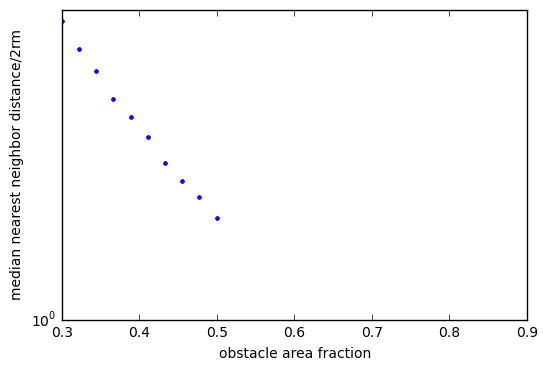

In [10]:
print phios
print nr
plt.semilogy(phios,nr,'.')
plt.xlim(0.3,0.9)
plt.ylim(1.0,1.2)
plt.xlabel('obstacle area fraction')
plt.ylabel('median nearest neighbor distance/2rm')
